# ROC_curve_benchmark

## 1. Read "casp3" data

In [1]:
import pandas as pd

In [2]:
actives = pd.read_csv('casp3/casp3/actives_final.ism', header=None, delim_whitespace=True, usecols=[2])
decoys  = pd.read_csv('casp3/casp3/decoys_final.ism' , header=None, delim_whitespace=True, usecols=[1])

actives.columns=['id']
actives['kind']=0

decoys.columns=['id']
decoys['kind']=1

# Someone removed "ZIN" from "ZINC" at decoys_final.ism
decoys['id']='ZIN'+decoys['id']

In [3]:
d = {}

# Read Qvina Scores
d['qvina'] = pd.read_csv('casp3/rescore/qvina.csv.gz', compression='gzip')

# Read rescores
for SF in ['vina','smina','vinardo']:
    d[SF] = pd.read_csv('casp3/rescore/rescore_' + SF + '.csv.gz', compression='gzip')
    
# Read RF-ScoreVS_v2 rescore
d['RFScoreVS_v2'] = pd.read_csv('casp3/rescore/rescore_rfscore.csv.gz', compression='gzip')
d['RFScoreVS_v2'].columns=['pose','id','RFScoreVS_v2']
d['RFScoreVS_v2']['RFScoreVS_v2'] = -d['RFScoreVS_v2']['RFScoreVS_v2']

In [4]:
# Concatenate all into "casp3"
df = pd.concat([actives, decoys])

for SF in d.keys():
    if SF == 'qvina':
        casp3 = pd.merge(df, d['qvina'], on='id')
    else:
        casp3 = pd.merge(casp3, d[SF], on=['id','pose'])

In [5]:
total = len(casp3)

In [6]:
# from scipy import stats
# import statistics

In [7]:
# for SF in casp3.columns[3:]:
    # # Remove outliers by the IQR method
    # Q1   = casp3[SF].quantile(0.25)
    # Q3   = casp3[SF].quantile(0.75)
    # IQR  = Q3 - Q1
    # casp3 = casp3[~((casp3[SF] < (Q1 - 1.5 * IQR))|(casp3[SF] > (Q3 + 1.5 * IQR)))]
    
    # # Or Remove outliers by the MAD method
    # M = statistics.median(casp3[SF])
    # MAD = stats.median_absolute_deviation(casp3[SF])
    # casp3 = casp3[~((casp3[SF] < (M - 3 * MAD))|(casp3[SF] > (M + 3 * MAD)))]

In [8]:
casp3

,id,kind,pose,qvina,vina,smina,vinardo,RFScoreVS_v2
0,CHEMBL180669,0,1,-4.4,-4.38646,-5.29339,-6.40548,-6.321281
1,CHEMBL180669,0,2,-4.3,-3.82455,-4.80099,-5.38578,-6.048931
2,CHEMBL180669,0,3,-4.2,7.86672,-5.27078,-6.88374,-6.170112
3,CHEMBL180669,0,4,-3.6,-3.55853,-4.50132,-6.04625,-5.968666
4,CHEMBL180669,0,5,-2.2,-2.83825,-4.25298,-4.49868,-5.959378
...,...,...,...,...,...,...,...,...
101697,ZINC67402245,1,6,-4.8,-4.63371,-5.28064,-4.81779,-5.956450
101698,ZINC67402245,1,7,-4.6,-4.52925,-5.02807,-3.78149,-5.952462
101699,ZINC67402245,1,8,-4.5,-4.11110,-5.18475,-4.20107,-5.958158
101700,ZINC67402245,1,9,-4.5,-3.84293,-4.24558,-3.35078,-5.968451


In [9]:
print(f'{total - len(casp3)} removed outliers: {total} -> {len(casp3)}')

0 removed outliers: 101702 -> 101702


## 2. Read "reni" data

In [10]:
actives = pd.read_csv('reni/reni/actives_final.ism', header=None, delim_whitespace=True, usecols=[2])
decoys  = pd.read_csv('reni/reni/decoys_final.ism' , header=None, delim_whitespace=True, usecols=[1])

actives.columns=['id']
actives['kind']=0

decoys.columns=['id']
decoys['kind']=1

# Someone removed "ZIN" from "ZINC" at decoys_final.ism
decoys['id']='ZIN'+decoys['id']

In [11]:
d = {}

# Read Qvina Scores
d['qvina'] = pd.read_csv('reni/rescore/qvina.csv.gz', compression='gzip')

# Read rescores
for SF in ['vina','smina','vinardo']:
    d[SF] = pd.read_csv('reni/rescore/rescore_' + SF + '.csv.gz', compression='gzip')

# Read RF-ScoreVS_v2 rescore
d['RFScoreVS_v2'] = pd.read_csv('reni/rescore/rfscore.csv.gz', compression='gzip')
d['RFScoreVS_v2'].columns=['pose','id','RFScoreVS_v2']
# Fix sign
d['RFScoreVS_v2']['RFScoreVS_v2'] = -d['RFScoreVS_v2']['RFScoreVS_v2']

# Read RF-Score_v2 rescore
d['RFScore_v2'] = pd.read_csv('reni/rescore/rescore_RFScore_v2.csv.gz', compression='gzip')
d['RFScore_v2'].columns=['pose','RFScore_v2','id']
# Fix sign
d['RFScore_v2']['RFScore_v2'] = -d['RFScore_v2']['RFScore_v2']

In [12]:
# Concatenate all into "casp3"
df = pd.concat([actives, decoys])

for SF in d.keys():
    if SF == 'qvina':
        reni = pd.merge(df, d['qvina'], on='id')
    else:
        reni = pd.merge(reni, d[SF], on=['id','pose'])

In [13]:
reni

,id,kind,pose,qvina,vina,smina,vinardo,RFScoreVS_v2,RFScore_v2
0,CHEMBL430539,0,1,-8.8,-8.84082,-9.24452,-10.04551,-6.469203,-7.884385
1,CHEMBL430539,0,2,-8.7,-7.58542,-8.06845,-8.31401,-6.534177,-7.790545
2,CHEMBL430539,0,3,-8.7,-8.15074,-8.57835,-9.68263,-7.082414,-7.954261
3,CHEMBL430539,0,4,-8.6,-7.96084,-8.36882,-8.60184,-6.258572,-7.724865
4,CHEMBL430539,0,5,-8.6,-7.77530,-8.13925,-8.21455,-6.471569,-7.797562
...,...,...,...,...,...,...,...,...,...
72432,ZINC27549402,1,7,-7.5,-7.68384,-8.35313,-8.52249,-5.998472,-7.472715
72433,ZINC27549402,1,8,-7.2,-7.36711,-7.93279,-7.43018,-5.958518,-7.547114
72434,ZINC27549402,1,9,-7.0,-6.85497,-7.42087,-8.16366,-5.958455,-7.212585
72435,ZINC27549402,1,10,-7.0,-6.01212,-6.78177,-6.13793,-5.985763,-7.318324


## Plot ROC curves

In [14]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

CASPASE-3
qvina: 0.573809
vina: 0.617383
smina: 0.614721
vinardo: 0.700648
RFScoreVS_v2: 0.782020

RENINE
qvina: 0.597174
vina: 0.598967
smina: 0.642871
vinardo: 0.737240
RFScoreVS_v2: 0.914616
RFScore_v2: 0.804660



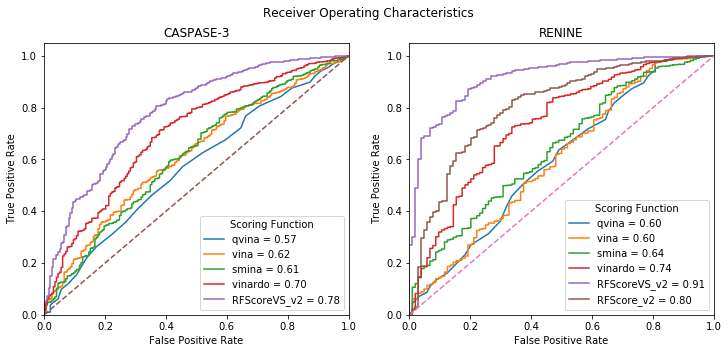

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# casp3
print('CASPASE-3')

for SF in casp3.columns[3:]:
    # 1st top pose according to each scoring function
    df = casp3.sort_values(SF).groupby('id').head(1)
    fpr, tpr,_ = roc_curve(df['kind'].to_numpy(), df[SF].to_numpy())
    roc_auc = auc(fpr, tpr)
    print(f'{SF}: {roc_auc:>.6f}')
    ax[0].plot(fpr, tpr, label=f'{SF} = {roc_auc:>.2f}')

# Plot a line
ax[0].plot([0,1], [0,1], linestyle='--')

# Some legends
ax[0].set(xlim=[0.0,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel='True Positive Rate')
ax[0].set_title('CASPASE-3')
ax[0].legend(title='Scoring Function',loc='lower right')

print()


# reni
print('RENINE')

for SF in reni.columns[3:]:
    # 1st top pose according to each scoring function
    df = reni.sort_values(SF).groupby('id').head(1)
    fpr, tpr,_ = roc_curve(df['kind'].to_numpy(), df[SF].to_numpy())
    roc_auc = auc(fpr, tpr)
    print(f'{SF}: {roc_auc:>.6f}')
    ax[1].plot(fpr, tpr, label=f'{SF} = {roc_auc:>.2f}')

# Plot a line
ax[1].plot([0,1], [0,1], linestyle='--')

# Some legends
ax[1].set(xlim=[0.0,1.0], ylim=[0.0,1.05], xlabel='False Positive Rate', ylabel='True Positive Rate')
ax[1].set_title('RENINE')
ax[1].legend(title='Scoring Function',loc='lower right')

print()

plt.suptitle('Receiver Operating Characteristics')
plt.show()